### Підготовка датасету

Мій датасет - результат аналізу найкращих пісень за 2010-2019 роки на платформі Spotify.Кількість стовпців - 14.

Стовпці датасету представляють такі характеристики пісні:

title — назва;

artist — ім'я виконавця;

top genre - назва жанру;

year - рік випуску;

bpm - (beats per minute) темп;

nrgy - коефіцієнт енергійності (чим вище значення, тим пісня енергічніша);

dnce - коефіцієнт можливості танцювання (чим вище значення, тим легше під неї танцювати);

dB - гучність (чим вище значення, тим пісня гучніша);

live - коефіцієнт живого запису (чим вище значення, тим більша імовірність, що трек записувався із живими інструментами);

val - мотив (чим вище значення, тим веселіший мотив);

dur - тривалість (в секундах);

acous - акустичність (чим вище значення, тим менше відлуння);

spch - коефіцієнт розмовності (чим вище значення, тим більше слів різноманітних слів було використано);

pop - коефіцієнт популярності (чим вище значення, тим більша популярність).

P.S. Значення визначене як коефіцієнт має можливий діапазон значень від 0 до 100.

In [2]:
# Датасет взято із https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/AlexRedchuk/csvSharing/master/top10s.csv"

df = pd.read_csv(url, encoding='cp1252')
df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
sub_df = df[df.groupby('top genre')['top genre'].transform('count')>30].copy() 
sub_df['top genre'].value_counts()

dance pop       327
pop              60
canadian pop     34
Name: top genre, dtype: int64

### Нормалізація

In [4]:
import pandas as pd
from sklearn import preprocessing

df_normalized = sub_df.copy()
non_categorial_fields = ['bpm', 'nrgy',	'dnce',	'dB',	'live',	'val',	'dur',	'acous',	'spch',	'pop']
x = sub_df[non_categorial_fields].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized[non_categorial_fields] = x_scaled
df_normalized

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,TiK ToK,Kesha,dance pop,2010,0.484277,0.835616,0.716216,0.9,0.375000,0.712766,0.227586,0.108696,0.244444,0.808081
3,Bad Romance,Lady Gaga,dance pop,2010,0.477987,0.945205,0.635135,0.8,0.083333,0.712766,0.555172,0.000000,0.022222,0.797980
4,Just the Way You Are,Bruno Mars,pop,2010,0.415094,0.835616,0.554054,0.7,0.097222,0.414894,0.300000,0.021739,0.022222,0.787879
5,Baby,Justin Bieber,canadian pop,2010,0.138365,0.863014,0.675676,0.7,0.125000,0.531915,0.275862,0.043478,0.244444,0.777778
6,Dynamite,Taio Cruz,dance pop,2010,0.484277,0.753425,0.702703,0.8,0.027778,0.829787,0.237931,0.000000,0.133333,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,0.685535,0.808219,0.662162,0.7,0.472222,0.925532,0.096552,0.141304,0.044444,0.787879
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,0.383648,0.589041,0.513514,0.5,0.250000,0.127660,0.144828,0.010870,0.000000,0.757576
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,0.327044,0.767123,0.702703,0.6,0.069444,0.606383,0.248276,0.228261,0.200000,0.757576
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,0.584906,0.726027,0.405405,0.7,0.097222,0.648936,0.434483,0.076087,0.688889,0.707071


P.S. Робота із пропущеними значеннями не потрібна, адже в мене пропущені такі дані

### Розподіл на навчальні та тестові дані

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df_normalized[non_categorial_fields] # Features
y = df_normalized['top genre'] # Target variable

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#import seaborn as sns
#sns.pairplot(df_normalized,hue='top genre',palette='Dark2')

In [8]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [9]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

canadian pop       0.00      0.00      0.00        11
   dance pop       0.78      1.00      0.88       109
         pop       0.00      0.00      0.00        19

    accuracy                           0.78       139
   macro avg       0.26      0.33      0.29       139
weighted avg       0.61      0.78      0.69       139

Evaluation: RBF kernel
              precision    recall  f1-score   support

canadian pop       0.00      0.00      0.00        10
   dance pop       0.81      1.00      0.90       113
         pop       0.00      0.00      0.00        16

    accuracy                           0.81       139
   macro avg       0.27      0.33      0.30       139
weighted avg       0.66      0.81      0.73       139

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

canadian pop       0.00      0.00      0.00        11
   dance pop       0.78      1.00      0.88      

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Графічне зображення

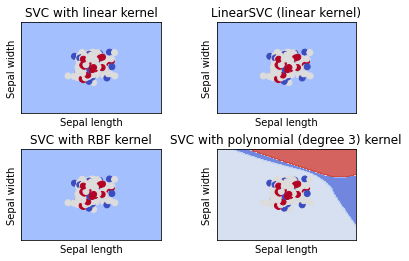

In [10]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
y2 = y.astype('category')
y2 = y2.cat.codes
y2 = y2.astype(float)
svc = SVC(kernel='linear', C=C).fit(X, y2)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y2)
poly_svc = SVC(kernel='poly', degree=10, C=C).fit(X, y2)
lin_svc = LinearSVC(C=C).fit(X, y2)

# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xpred = np.array([xx.ravel(), yy.ravel()] + [np.repeat(0, xx.ravel().size) for _ in range(8)]).T
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(Xpred)
    #print(Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y2, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Пошук оптимальних параметрів

#### Розширив діапазон роботи пошуку оптимальних параметрів

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1, 20, 1), 'gamma': np.arange(0.05, 0.5, 0.05),'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print('Best:', grid.best_estimator_)

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
[CV] END ........................C=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.05,

[CV] END .........C=1, gamma=0.35000000000000003, kernel=rbf; total time=   0.0s
[CV] END .........C=1, gamma=0.35000000000000003, kernel=rbf; total time=   0.0s
[CV] END .........C=1, gamma=0.35000000000000003, kernel=rbf; total time=   0.0s
[CV] END .........C=1, gamma=0.35000000000000003, kernel=rbf; total time=   0.0s
[CV] END .........C=1, gamma=0.35000000000000003, kernel=rbf; total time=   0.0s
[CV] END ........C=1, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END ........C=1, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END ........C=1, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END ........C=1, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END ........C=1, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END .....C=1, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=1, gamma=0.3

[CV] END .....C=2, gamma=0.15000000000000002, kernel=sigmoid; total time=   0.0s
[CV] END .....C=2, gamma=0.15000000000000002, kernel=sigmoid; total time=   0.0s
[CV] END .....C=2, gamma=0.15000000000000002, kernel=sigmoid; total time=   0.0s
[CV] END .....C=2, gamma=0.15000000000000002, kernel=sigmoid; total time=   0.0s
[CV] END ......C=2, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ......C=2, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ......C=2, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ......C=2, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ......C=2, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END .........................C=2, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .........................C=2, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .........................C=2, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=3, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=3, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=3, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=3, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ........................C=3, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .......................C=3, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=3, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=3, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=3, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END .......................C=3, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ....................C=3, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=3, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ........C=3, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END .....C=3, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=3, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=3, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=3, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=3, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ......C=3, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ......C=3, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ......C=3, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ......C=3, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ......C=3, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .........................C=3, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=4, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=4, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=4, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=4, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ........................C=4, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END ........................C=4, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END ........................C=4, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END ........................C=4, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END ........................C=4, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END .......................C=4, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END .......................C=4, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END .......................C=4, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.05, kernel=linear; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ........................C=5, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=5, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=6, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END .......................C=6, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ....................C=6, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=6, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=6, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=6, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=6, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=6, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=6, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=6, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=6, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=6, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .....................C=7, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=7, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=7, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=7, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=7, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=7, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=7, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=7, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END ........C=7, gamma=

[CV] END ......................C=7, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=7, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ........................C=7, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=7, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=7, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=7, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=7, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=7, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END .......................C=7, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END .......................C=7, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .....................C=8, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=8, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .....................C=8, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END .........................C=8, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=8, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=8, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=8, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=8, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=8, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END ........................C=8, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END ........................C=8, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END ........................C=8, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........C=9, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=9, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=9, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=9, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END .........C=9, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END ........C=9, gamma=0.15000000000000002, kernel=poly; total time=   0.0s
[CV] END ........C=9, gamma=0.15000000000000002, kernel=poly; total time=   0.0s
[CV] END ........C=9, gamma=

[CV] END ......................C=9, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ......................C=9, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END ........................C=9, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=9, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=9, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=9, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ........................C=9, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=9, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END .......................C=9, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END .......................C=9, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END .......................C=9, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.3, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=11, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=11, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=11, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END ........C=11, gamma=0.15000000000000002, kernel=rbf; total time=   0.0s
[CV] END ........C=11, gamma

[CV] END ....................C=11, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=11, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=11, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END .....................C=11, gamma=0.4, kernel=linear; total time=   0.0s
[CV] END .......................C=11, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=11, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=12, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ......................C=12, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ......................C=12, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ......................C=12, gamma=0.25, kernel=poly; total time=   0.0s
[CV] END ...................C=12, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=12, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=12, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=12, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=12, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=12, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=12, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=12, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=13, gamma=0.05, kernel=linear; total time=   0.0s
[CV] END ....................C=13, gamma=0.05, kernel=linear; total time=   0.0s
[CV] END ........................C=13, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=13, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=13, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=13, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=13, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=13, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=13, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=13, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=13, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=13, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....C=13, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=13, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=13, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=13, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=13, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=13, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=13, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=13, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=13, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=13, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ........................C=13, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=13, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....C=14, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END .....C=14, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END .....C=14, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ........................C=14, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=14, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=14, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=14, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=14, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=14, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=14, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=14, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=14, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .......................C=15, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ......................C=15, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ......................C=15, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ......................C=15, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ......................C=15, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ......................C=15, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ...................C=15, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=15, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=15, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=15, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=15, gamma=0.05, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=15, gamma=0.05, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......C=15, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END .......C=15, gamma=0.35000000000000003, kernel=poly; total time=   0.0s
[CV] END ....C=15, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=15, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=15, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=15, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END ....C=15, gamma=0.35000000000000003, kernel=sigmoid; total time=   0.0s
[CV] END .....C=15, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=15, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=15, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=15, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END .....C=15, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .....C=16, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END .....C=16, gamma=0.15000000000000002, kernel=linear; total time=   0.0s
[CV] END ........................C=16, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=16, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=16, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=16, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END ........................C=16, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=16, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=16, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=16, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=16, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END .......................C=16, gamma=0.2, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .......................C=16, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=16, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=16, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END .......................C=16, gamma=0.45, kernel=rbf; total time=   0.0s
[CV] END ......................C=16, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ......................C=16, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ......................C=16, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ......................C=16, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ......................C=16, gamma=0.45, kernel=poly; total time=   0.0s
[CV] END ...................C=16, gamma=0.45, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=16, gamma=0.45, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=16, gamma=0.45, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ...................C=17, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=17, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=17, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=17, gamma=0.25, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=17, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=17, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=17, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=17, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ....................C=17, gamma=0.25, kernel=linear; total time=   0.0s
[CV] END ........................C=17, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=17, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ........................C=17, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=18, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=18, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ....................C=18, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=18, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=18, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=18, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....C=18, gamma=0.35000000000000003, kernel=linear; total time=   0.0s
[CV] END ........................C=18, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END ........................C=18, gamma=0.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=18, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END .......................C=18, gamma=0.4, kernel=poly; total time=   0.0s
[CV] END ....................C=18, gamma=0.4, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ....................C=19, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=19, gamma=0.2, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=19, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=19, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=19, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=19, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .....................C=19, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END .......................C=19, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END .......................C=19, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END .......................C=19, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END .......................C=19, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END .......................C=19, gamma=0.25, kernel=rbf; total time=   0.0s
[CV] END ...................

Best: SVC(C=1, gamma=0.45, kernel='poly')


In [12]:
svc = SVC(C=1, kernel='poly', gamma=0.45)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7410071942446043


In [13]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  0  10   0]
 [  0 103   0]
 [  0  26   0]]
              precision    recall  f1-score   support

canadian pop       0.00      0.00      0.00        10
   dance pop       0.74      1.00      0.85       103
         pop       0.00      0.00      0.00        26

    accuracy                           0.74       139
   macro avg       0.25      0.33      0.28       139
weighted avg       0.55      0.74      0.63       139



c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo